In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import (
    datasets, metrics, model_selection as skms, neighbors, naive_bayes
)

In [14]:
dataset = datasets.load_wine()
dataframe = pd.DataFrame(dataset.data, columns=dataset.feature_names)
dataframe["target"] = dataset.target
display(pd.concat([dataframe.head(3), dataframe.tail(3)]))

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.20,0.61,1.60,560.0,2


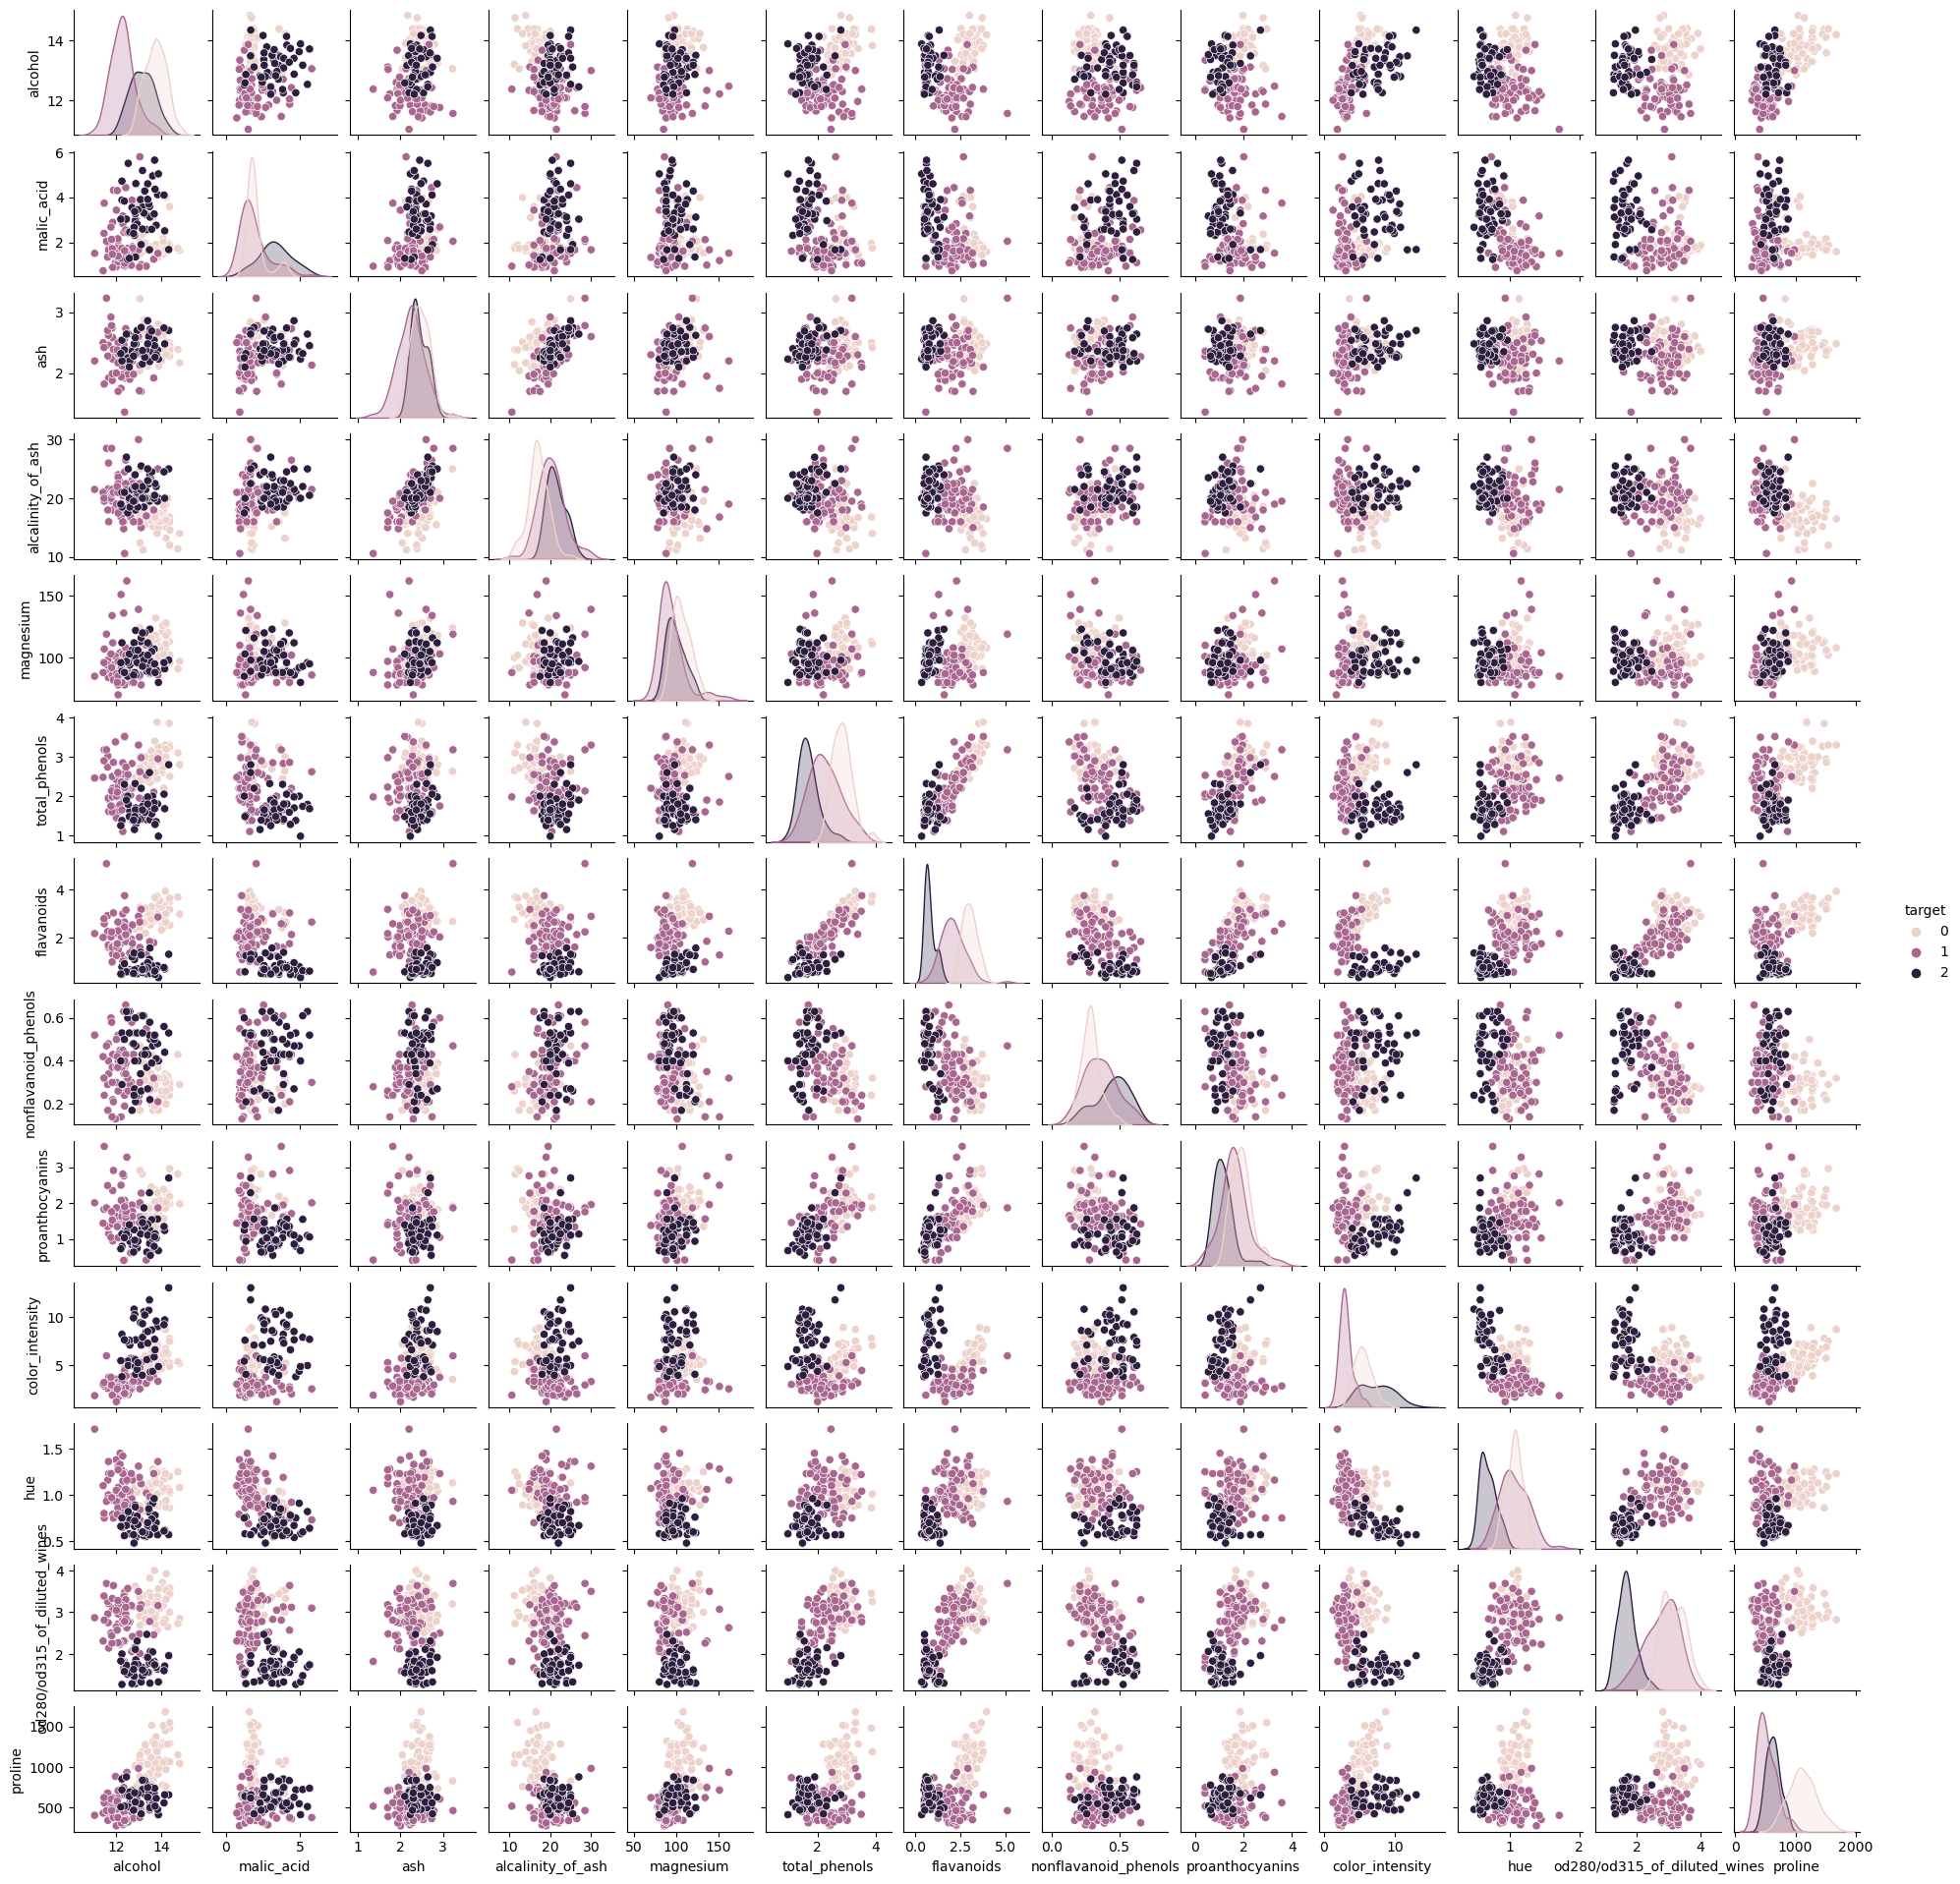

In [17]:
sns.pairplot(dataframe, hue="target", height=1.5)

In [22]:
# printing target names
print(f"{dataset.target_names}")

['class_0' 'class_1' 'class_2']


In [26]:
# splitting the dataset into the training and the testing subsets
(dataset_train_ftrs, dataset_test_ftrs, dataset_train_trgt, dataset_test_trgt) = skms.train_test_split(dataset.data, dataset.target, test_size=0.8, random_state=42)
dataset_train_ftrs, dataset_test_ftrs, dataset_train_trgt, dataset_test_trgt

(array([[1.332e+01, 3.240e+00, 2.380e+00, 2.150e+01, 9.200e+01, 1.930e+00,
         7.600e-01, 4.500e-01, 1.250e+00, 8.420e+00, 5.500e-01, 1.620e+00,
         6.500e+02],
        [1.296e+01, 3.450e+00, 2.350e+00, 1.850e+01, 1.060e+02, 1.390e+00,
         7.000e-01, 4.000e-01, 9.400e-01, 5.280e+00, 6.800e-01, 1.750e+00,
         6.750e+02],
        [1.237e+01, 1.130e+00, 2.160e+00, 1.900e+01, 8.700e+01, 3.500e+00,
         3.100e+00, 1.900e-01, 1.870e+00, 4.450e+00, 1.220e+00, 2.870e+00,
         4.200e+02],
        [1.374e+01, 1.670e+00, 2.250e+00, 1.640e+01, 1.180e+02, 2.600e+00,
         2.900e+00, 2.100e-01, 1.620e+00, 5.850e+00, 9.200e-01, 3.200e+00,
         1.060e+03],
        [1.272e+01, 1.750e+00, 2.280e+00, 2.250e+01, 8.400e+01, 1.380e+00,
         1.760e+00, 4.800e-01, 1.630e+00, 3.300e+00, 8.800e-01, 2.420e+00,
         4.880e+02],
        [1.305e+01, 1.730e+00, 2.040e+00, 1.240e+01, 9.200e+01, 2.720e+00,
         3.270e+00, 1.700e-01, 2.910e+00, 7.200e+00, 1.120e+00, 2.910e

In [27]:
# models for the evaluation
models = {
    "knn": neighbors.KNeighborsClassifier(n_neighbors=3),
    "nb": naive_bayes.GaussianNB()
}

In [31]:
for model_name, model in models.items():
    fit = model.fit(dataset_train_ftrs, dataset_train_trgt)
    preds = model.predict(dataset_test_ftrs)
    accuracy = metrics.accuracy_score(dataset_test_trgt, preds)
    print(f"{}: {}")